## CTR Analysis
### Project Goal
The purpose of this notebook is to analyze the click through rate for each L1 category. We'll leverage these data later to identify top revenue-based SEO optimization oppurtunities 

### Steps
1- Importing Data<br>
2- Data Cleaning<br>
3- Data visualization and Analysis

### Data
The data is imported from Google Search Console and contains below columns. Note that the date range is from "2022-01-01" to "2022-12-29"

### Data Columns

**Date**: Date<br>
<br>
**Total_Position_Google_Search_Console**: avg. position * impression<br>
<br>
**Page__Google_Search_Console**: the website URL<br>
<br>
**Query__Google_Search_Console**: The query<br>
<br>
**Impressions__Google_Search_Console**: Sum of impressions based on the date, query<br>
<br>
**Clicks__Google_Search_Console**: Sum of clicks based on the date,query




In [13]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



### Importing Data

Since the data is briken down by the L1 categories, so we'll import them one by one and merge them along the y axis

In [64]:
appliances = pd.read_csv(r"C:\HD\GCS files\Appliances.csv")
bath = pd.read_csv(r"C:\HD\GCS files\Bath.csv")
building_materials = pd.read_csv(r"C:\HD\GCS files\Building-materials.csv")
decor = pd.read_csv(r"C:\HD\GCS files\decor.csv")
floor = pd.read_csv(r"C:\HD\GCS files\floor.csv")
kitchen = pd.read_csv(r"C:\HD\GCS files\kitchen.csv")
lighting = pd.read_csv(r"C:\HD\GCS files\Lighting & Ceiling Fans.csv")
outdoors = pd.read_csv(r"C:\HD\GCS files\Outdoors.csv")
tools = pd.read_csv(r"C:\HD\GCS files\Tools.csv")
windows_and_doors = pd.read_csv(r"C:\HD\GCS files\Windows-and-Doors.csv")



In [65]:
categories = [appliances,bath,building_materials,decor,floor,kitchen,lighting,outdoors,tools,windows_and_doors]

df_lenght =[]
for i in categories:

    lenght = len(i)
    df_lenght.append(lenght)

print(sum(df_lenght))

2216051


In [66]:
#adding a new column as "L1" to each dataframe

appliances['L1'] = 'appliances'
bath['L1'] = 'bath'
building_materials['L1'] = 'building_materials'
decor['L1'] = 'decor'
floor['L1'] = 'floor'
kitchen['L1'] = 'kitchen'
lighting['L1'] = 'lighting'
outdoors['L1'] = 'outdoors'
tools['L1'] = 'tools'
windows_and_doors['L1'] = 'windows_and_doors'



In [67]:
#merging the dataframes

df = pd.concat([appliances,bath,building_materials,decor,floor,kitchen,lighting,outdoors,tools,windows_and_doors], ignore_index=True)

In [68]:
df['L1'].unique()

array(['appliances', 'bath', 'building_materials', 'decor', 'floor',
       'kitchen', 'lighting', 'outdoors', 'tools', 'windows_and_doors'],
      dtype=object)

In [69]:
len(df)

2216051

## Data Cleaning
to measure the CTR, we need to remove the branded terms since they tend to have high CTR. This part might be challenging since there are different variations of "Home Depot" in search terms.

In [70]:
#let's delete not important columns

df.drop(['Data_Source_type','Data_Source_id','Currency','Site_URL__Google_Search_Console','Device__Google_Search_Console'],inplace=True, axis=1)

In [71]:
df.head()

,Date,Total_Position__Google_Search_Console,Query__Google_Search_Console,Page__Google_Search_Console,Impressions__Google_Search_Console,Country__Google_Search_Console,Clicks__Google_Search_Console,L1
0,2022-03-04,2.0,home depot canada refrigerators,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
1,2022-03-02,2.0,swiffer vacuum home depot,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
2,2022-03-03,2.0,24 inch bar fridge,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
3,2022-03-03,2.0,white electric stove,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
4,2022-03-01,2.0,black microwave,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances


In [74]:
#let's explore "Conntry_google_Search_console" column

(df['Country__Google_Search_Console'].value_counts())/len(df)*100

can    99.510029
usa     0.290878
gbr     0.018456
tur     0.011146
ind     0.010650
         ...    
ago     0.000045
hti     0.000045
rwa     0.000045
mkd     0.000045
lie     0.000045
Name: Country__Google_Search_Console, Length: 159, dtype: float64

99.5% of the clicks come from Canada, so we can remove the columns for other countries

In [75]:
df_can = df.loc[df['Country__Google_Search_Console']=='can']

In [77]:
len(df_can)

2205193

In [78]:
df_can.columns

Index(['Date', 'Total_Position__Google_Search_Console',
       'Query__Google_Search_Console', 'Page__Google_Search_Console',
       'Impressions__Google_Search_Console', 'Country__Google_Search_Console',
       'Clicks__Google_Search_Console', 'L1'],
      dtype='object')

In [79]:
#let's rename the columns so they're are easier to read 

df_can = df_can.rename(columns={'Total_Position__Google_Search_Console':'Total_Position','Query__Google_Search_Console':'Query','Page__Google_Search_Console':'URL','Impressions__Google_Search_Console':'Impressions','Country__Google_Search_Console':'Country','Clicks__Google_Search_Console':'Clicks'})

In [80]:
df_can.head()

,Date,Total_Position,Query,URL,Impressions,Country,Clicks,L1
0,2022-03-04,2.0,home depot canada refrigerators,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
1,2022-03-02,2.0,swiffer vacuum home depot,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
2,2022-03-03,2.0,24 inch bar fridge,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
3,2022-03-03,2.0,white electric stove,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances
4,2022-03-01,2.0,black microwave,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances


In [101]:
branded_terms = ['home depot', 'homedepot','home deppot','home dept','home dpot','homedpot',
                 'home dpot','hmedepot','hme depot','homw depot']

pattern = '|'.join(branded_terms)

non_branded_df = df_can[~df_can['Query'].str.contains(pattern, regex=True)]

In [111]:
non_branded_df['Query'].head(50)

2                         24 inch bar fridge
3                       white electric stove
4                            black microwave
6        top loading washing machines canada
7                   fridge no freezer canada
8                         vissani range hood
11                     ge wine fridge canada
14                         vissani microwave
19                over the counter microwave
20                    room humidifier canada
21    small space stackable washer and dryer
23                        fridge double door
24                        combo washer dryer
25                      propane stove canada
26                     small shop vac canada
29                  vertical air conditioner
32          over the range microwaves canada
33                       deep freezer canada
34                            fridge 36 inch
37                    magic chef wine fridge
40          built-in microwave with trim kit
41            over the range microwave white
42        

In [113]:
#let's add 2 columns for quarter and month

non_branded_df['Date'] = pd.to_datetime(non_branded_df['Date'])

In [122]:
non_branded_df['Month'] = non_branded_df['Date'].dt.strftime('%b')
non_branded_df['Quarter'] = non_branded_df['Date'].dt.quarter

In [123]:
non_branded_df.head()

,Date,Total_Position,Query,URL,Impressions,Country,Clicks,L1,Month,Quarter
2,2022-03-03,2.0,24 inch bar fridge,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances,Mar,1
3,2022-03-03,2.0,white electric stove,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances,Mar,1
4,2022-03-01,2.0,black microwave,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances,Mar,1
6,2022-03-01,2.0,top loading washing machines canada,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances,Mar,1
7,2022-03-04,2.0,fridge no freezer canada,https://www.homedepot.ca/en/home/categories/ap...,2,can,1,appliances,Mar,1


In [136]:
#adding the avg. position column
non_branded_df['AVG Position'] = (non_branded_df['Total_Position']/non_branded_df['Impressions']).round()

In [153]:

result_df = non_branded_df.groupby(['L1', 'AVG Position']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
result_df['CTR'] = (result_df['Clicks']/result_df['Impressions'])*100
final_df = result_df[result_df['AVG Position']<11]


In [156]:
final_df

,L1,AVG Position,Impressions,Clicks,CTR
0,appliances,1.0,571650,99193,17.352051
1,appliances,2.0,288425,40358,13.992546
2,appliances,3.0,344408,35120,10.197208
3,appliances,4.0,293732,27457,9.347637
4,appliances,5.0,208347,17141,8.227140
5,appliances,6.0,157395,12785,8.122876
6,appliances,7.0,91796,6432,7.006841
7,appliances,8.0,76144,5077,6.667630
8,appliances,9.0,49156,3201,6.511921
9,appliances,10.0,42082,2984,7.090918


In [177]:
final_df['L1'].unique()

array(['appliances', 'bath', 'building_materials', 'decor', 'floor',
       'kitchen', 'lighting', 'outdoors', 'tools', 'windows_and_doors'],
      dtype=object)

In [191]:
filtered_df = final_df[final_df['L1']=='windows_and_doors'][['AVG Position','CTR']]
filtered_df.head()

,AVG Position,CTR
368,1.0,18.791605
369,2.0,13.574292
370,3.0,10.289922
371,4.0,8.836548
372,5.0,5.403796


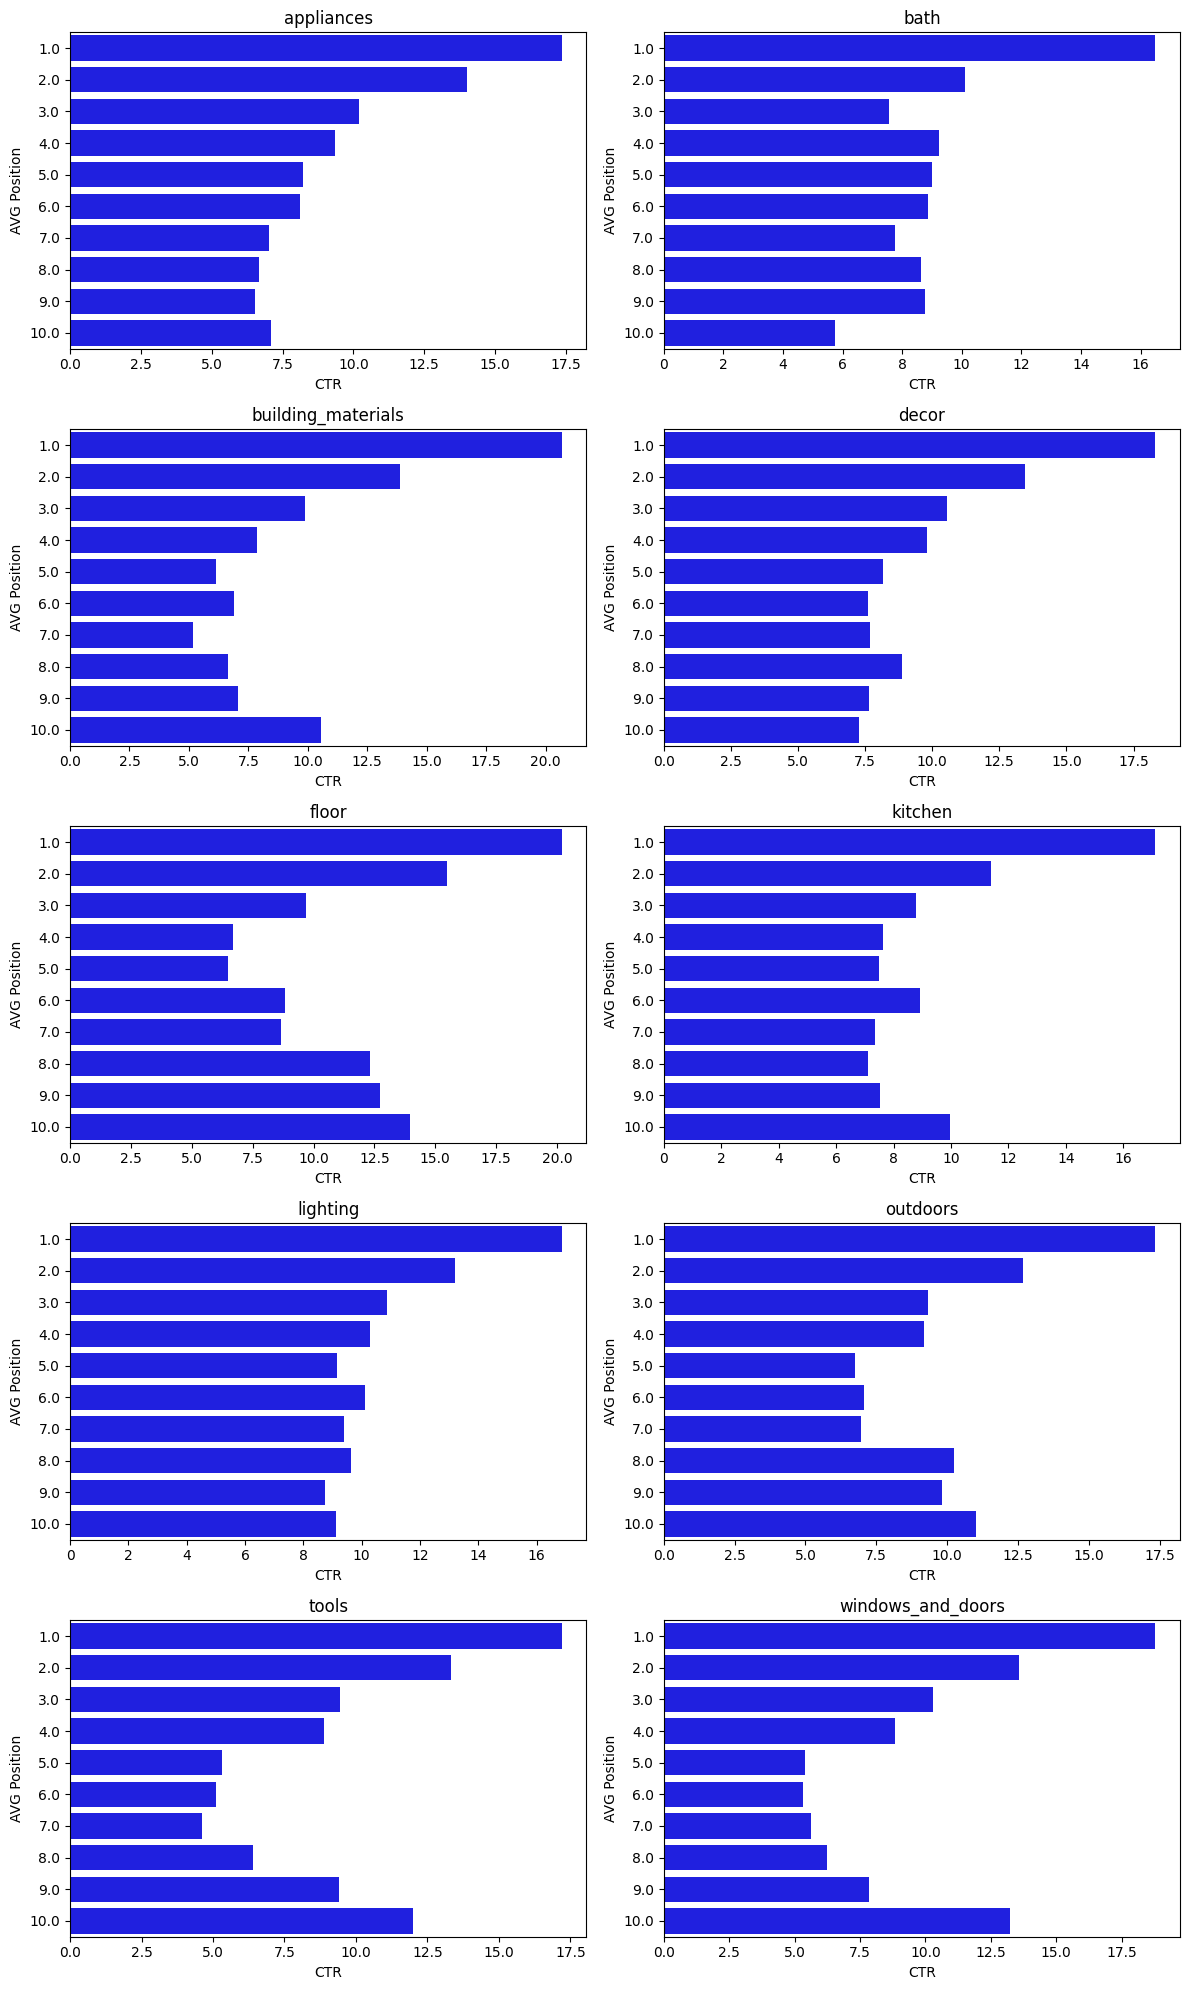

In [205]:
categories = ['appliances', 'bath', 'building_materials', 'decor', 'floor', 'kitchen', 'lighting', 'outdoors', 'tools', 'windows_and_doors']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for idx, cat in enumerate(categories):
    filtered_df = final_df[final_df['L1'] == cat][['AVG Position', 'CTR']]
    sns.barplot(data=filtered_df, x='CTR', y='AVG Position', orient='h', color='blue', ax=axes[idx])
    axes[idx].set_xlabel('CTR')
    axes[idx].set_ylabel('AVG Position')
    axes[idx].set_title(cat)
    
plt.tight_layout()
plt.show()


In [230]:
windows_and_doors = non_branded_df[non_branded_df['L1']=='windows_and_doors']

for i in range(1,11):
    df= windows_and_doors[windows_and_doors['AVG Position']==i]
    print(f'length of the data for position {i}:{len(df)},  ({(len(df)/len(windows_and_doors))*100} of total)')
    print('-------------------')



length of the data for position 1:26726,  (49.20918414317541 of total)
-------------------
length of the data for position 2:11109,  (20.45441991493436 of total)
-------------------
length of the data for position 3:6427,  (11.833698514113163 of total)
-------------------
length of the data for position 4:4410,  (8.119902045626116 of total)
-------------------
length of the data for position 5:2280,  (4.198044595017584 of total)
-------------------
length of the data for position 6:1567,  (2.885235035259892 of total)
-------------------
length of the data for position 7:672,  (1.2373184069525511 of total)
-------------------
length of the data for position 8:507,  (0.9335125481025943 of total)
-------------------
length of the data for position 9:242,  (0.44558192631326987 of total)
-------------------
length of the data for position 10:182,  (0.3351070685496492 of total)
-------------------


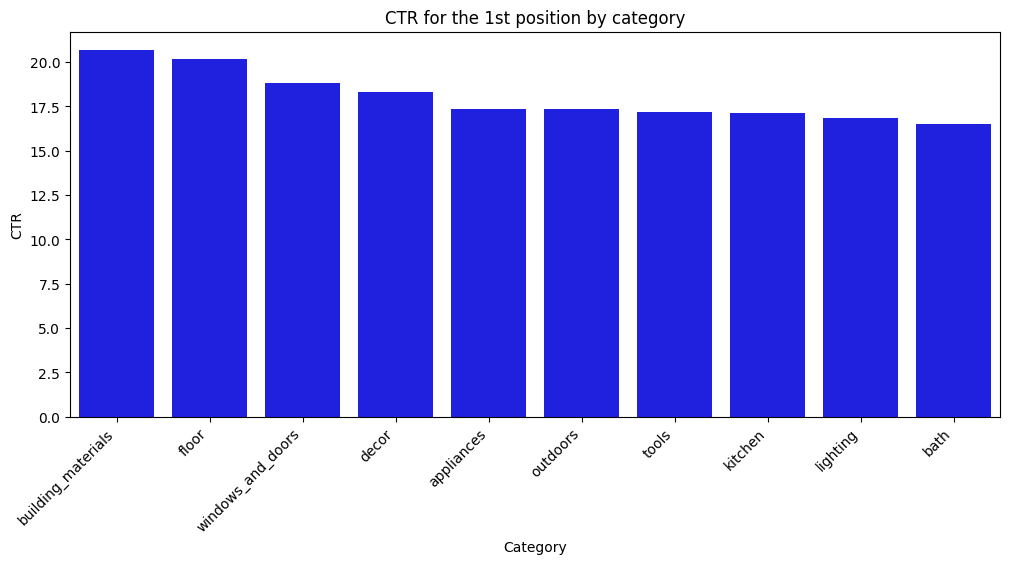

In [246]:
plt.figure(figsize=(12,5))
sns.barplot(data=final_df[final_df['AVG Position']==1].sort_values(by='CTR', ascending=False), x='L1',y='CTR', color='b')
plt.xlabel('Category')
plt.ylabel('CTR')
plt.title('CTR for the 1st position by category')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

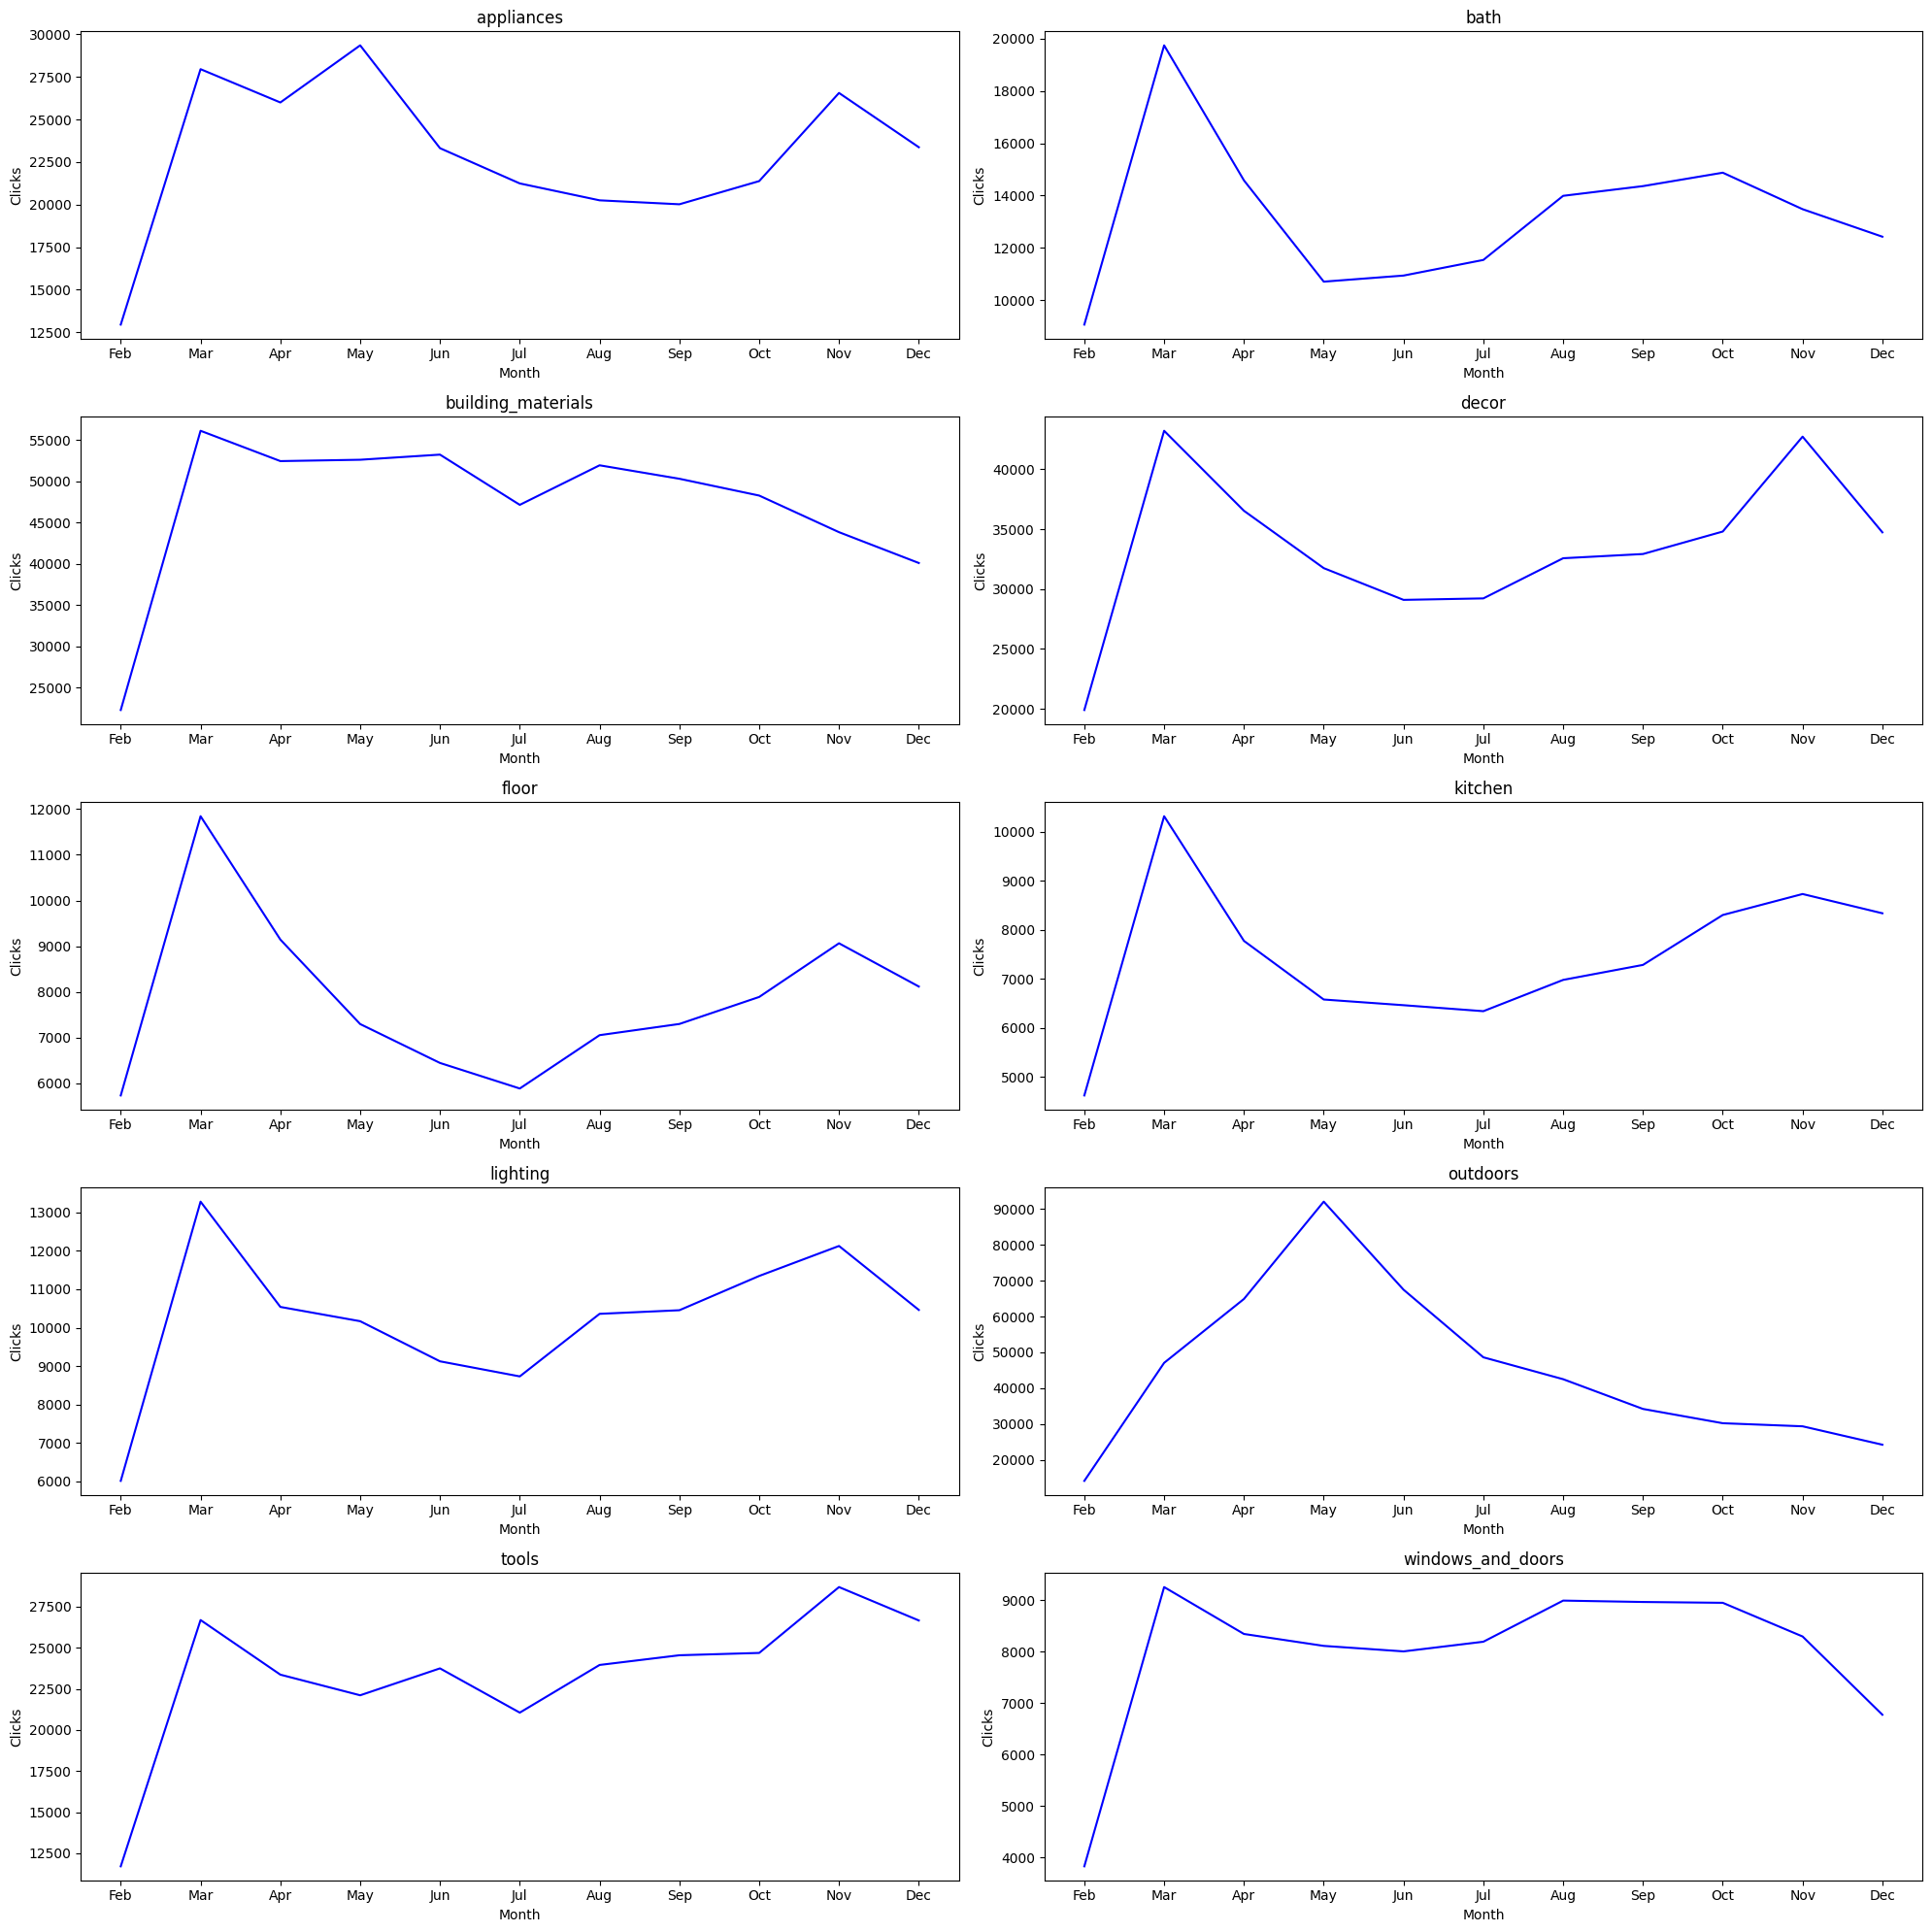

In [265]:

categories = ['appliances', 'bath', 'building_materials', 'decor', 'floor', 'kitchen', 'lighting', 'outdoors', 'tools', 'windows_and_doors']
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for idx, cat in enumerate(categories):
    filtered_df = non_branded_df[non_branded_df['L1'] == cat]
    # Group and sum the 'Clicks' data by 'Month'
    aggregated_df = filtered_df.groupby('Month')['Clicks'].sum().reindex(Months)
    sns.lineplot(data=aggregated_df, x=aggregated_df.index, y=aggregated_df.values, color='blue', ax=axes[idx])
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Clicks')
    axes[idx].set_title(cat)

plt.tight_layout()
plt.show()
